In [165]:
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [166]:
with open('evp/2024-12-20_Viscoplastic_PC1D_process1_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [167]:
E_bar = 1/np.mean(1/data['youngs_modulus'], axis=1, keepdims=True)

In [168]:
s_pred = np.zeros(data['stress'].shape)

In [169]:
xi = np.zeros((1000, 5001, 1))
dt = 1/ 5000
for i in range(data['stress'].shape[1]-1):
    increment = np.mean(E_bar**data['rate_exponent']*data['rate_constant']*np.abs(data['strain'][:,i] - xi[:,i])**data['rate_exponent']*data['yield_stress']**(-data['rate_exponent']), axis=1, keepdims=True)
    xi[:,i+1] = xi[:,i] + dt*np.sign(data['strain'][:,i] - xi[:,i])*increment
    s_pred[:,i+1] = E_bar*(data['strain'][:,i+1] - xi[:,i+1])

In [170]:
error = np.mean((s_pred - data['stress'])**2)


In [171]:
dt, error

(0.0002, 8.417327141135792e-07)

In [181]:
import util as util
import m_evp as m_evp
import importlib
util = importlib.reload(util)
m_evp = importlib.reload(m_evp)

In [182]:
step = 5
dataset = util.ViscoplasticDataset('evp_data/2024-12-20_Viscoplastic_PC1D_process1_data.pkl', step)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)
evp_model = m_evp.ViscoplasticMaterialModel([1, 20],
    dt=0.0002*step)

FileNotFoundError: [Errno 2] No such file or directory: 'evp/2024-12-20_Viscoplastic_PC1D_process1_data.pkl'

In [ ]:
for x,y in dataloader:
    e, E, Y, n, edot_0, = x
    
    
    y_pred,_ = evp_model(e, E, Y, n, edot_0)
    
    break

torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 20]) torch.Size([32, 1])
torch.Size([32, 

In [177]:
e.shape, y_pred.shape

(torch.Size([32, 1251, 1]), torch.Size([32, 1251, 1]))

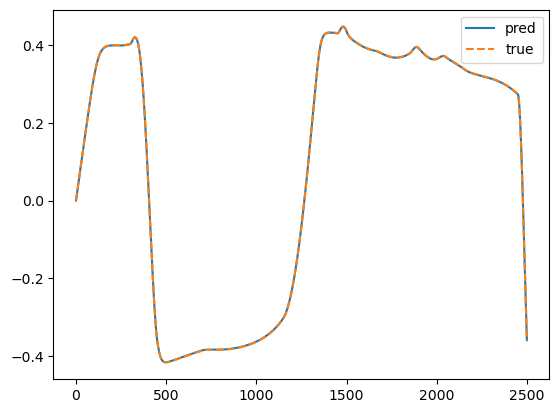

In [161]:
i = 15
plt.plot(y_pred[i].detach().numpy(), label='pred')
plt.plot(y[i].detach().numpy(), '--', label='true')
plt.legend()


In [48]:
y_pred.shape

torch.Size([32, 5001, 1])